# Sean Pharris
# March 16, 2022
# PCA

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clean-churn-data/churn_clean.csv
/kaggle/input/clean-churn-data/D207 D208 D209 Churn Data Consideration and Dictionary.pdf


### A. 

### 1. Which variables explain the most variance when it comes to customer churn?

### 2. The goal of the data analysis is to determine which components of the data set explain the most variance in customer churn. These variables will represent the major factors that customers care about in the service.
 


### B.  

### 1.  PCA analyzes all variables and their explained variance based on their influence of the overall data. After conducting the PCA, we can expect to find the overall sum of variance and each individual variance per feature.

### 2.  Assumption:
    * We will encode and normalize the data to make sure all data is continuous because it is required for analysis. We can assume that Yes/No variables will have less of an impact on the overall analysis. 



### C.  

### 1. Continuous data types:

'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening'


### 2. See code below to find standardization of continuous data set variables.

### C1.  To see cleaned data set, see attachment "PCA_churn.csv".

# Data preparation

### Read data in to data frame

In [2]:
# Read in data set into the data frame 
df = pd.read_csv('../input/clean-churn-data/churn_clean.csv')

### Drop categorical data type columns

In [3]:
# Drop unnecessary columns
df.drop(columns=['CaseOrder','UID', 'Customer_id','Interaction', 'Job','State','City','County','Zip','Lat','Lng', 'TimeZone', 'Marital', 'Area', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], inplace=True)

### Change column names to make them more understandable

In [4]:
# Renaming the survey columns
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'TimelyFixes', 
                     'Item3':'TimelyReplacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'RespectfulResponse', 
                     'Item7':'CourteousExchange', 
                     'Item8':'EvidenceOfActiveListening'}, 
          inplace=True)

In [5]:
# Desired data set
df.to_csv('PCA_churn.csv', index=False)

### D1.

In [6]:
scaler = StandardScaler()
df_std = df

le = preprocessing.LabelEncoder()

# transforming categorical datatypes into numerical types
'''for feature in categorical:
    df_std[feature] = le.fit_transform(df_std[feature])'''

df_std = scaler.fit_transform(df_std)
    
df_std  

array([[-0.67340479, -0.97233791,  0.72092524, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [ 0.04777153, -0.50659192, -1.25995716, ..., -0.48116458,
         0.47693123,  0.49038392],
       [-0.41723753,  0.89064606, -0.14873045, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [-0.64790585, -0.50659192, -0.24535886, ...,  0.48638938,
         0.47693123,  1.46259628],
       [ 1.78897441, -0.50659192, -0.6801867 , ..., -0.48116458,
         1.44926808,  0.49038392],
       [ 0.17138592, -0.50659192, -1.21164295, ..., -0.48116458,
         0.47693123, -2.42625317]])

In [7]:
pca = PCA()
pca.fit(df_std)

PCA()

In [8]:
pca.explained_variance_ratio_

array([0.15518775, 0.10510063, 0.0861344 , 0.0556271 , 0.05420493,
       0.05364404, 0.05287854, 0.05258933, 0.05218578, 0.05161265,
       0.05075795, 0.05057251, 0.04098201, 0.0363229 , 0.0311726 ,
       0.02830243, 0.02535407, 0.01708302, 0.00028734])

### D2.

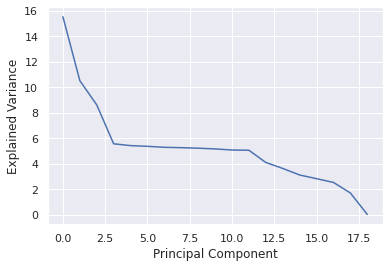

In [9]:
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [10]:
components = [i * 100 for i in list(pca.explained_variance_ratio_)]

### D3.

### All components explained variance

In [11]:
for n, i in enumerate(components):
    print('Principal Component ', n + 1, ' explained variance: ', i)

Principal Component  1  explained variance:  15.518775354130712
Principal Component  2  explained variance:  10.51006312846736
Principal Component  3  explained variance:  8.613440016406944
Principal Component  4  explained variance:  5.562709862251329
Principal Component  5  explained variance:  5.420493349832502
Principal Component  6  explained variance:  5.36440404363624
Principal Component  7  explained variance:  5.28785410313537
Principal Component  8  explained variance:  5.25893304534812
Principal Component  9  explained variance:  5.218578270985741
Principal Component  10  explained variance:  5.16126522770154
Principal Component  11  explained variance:  5.075795398769438
Principal Component  12  explained variance:  5.0572514473764745
Principal Component  13  explained variance:  4.098201449696796
Principal Component  14  explained variance:  3.6322895896714598
Principal Component  15  explained variance:  3.1172602865929875
Principal Component  16  explained variance:  2.8

### Principal components explained variance

In [12]:
principal_components = []
for n, i in enumerate(components):
    if n == 3:
        break
    principal_components.append(i)
    print('Principal Component ', n + 1, ' explained variance: ', i)

Principal Component  1  explained variance:  15.518775354130712
Principal Component  2  explained variance:  10.51006312846736
Principal Component  3  explained variance:  8.613440016406944


### D4.

In [13]:
print('Total variance from principal components: ', sum(principal_components))

Total variance from principal components:  34.642278499005016


### D5. Summary

After performing data analysis, we found that there are 3 principal component consisting of roughly 35% of the explained variance. We could use this method to reduce the model significantly to help save computation power and demystify the importance of the features that matter to the customer. Also after reviewing the visual aid, it appears as if components 4 - 11 have hardly any influence on the data at all.